# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [2]:
# Example file location
filename_tan = 'timer_output1_tan.dat'
file_chris= 'chris_data_0.dat'
file_better_data='better_data_pendulum.dat'
file_dile_timer_output_luca='timer_output_luca.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

In [4]:
def fit_func(x,k,b):
    return k*x+b
#the function need to be fitted

## Read and plot the data

In [5]:
#all people's data
    
data_example = read_data(filename_tan)
n, t = data_example['n'], data_example['t_s']


data_example1 = read_data(file_chris)
n1, t1 = data_example1['n'], data_example1['t_s']

#Michael 1
data_example2= read_data(file_better_data)
n2,t2=data_example2['n'], data_example2['t_s']

data_example3=read_data(file_dile_timer_output_luca)
n3,t3= data_example3['n'], data_example3['t_s']



In [6]:
#deal with tan's data
#the first fit use the std as an error
chi2_object_tan = Chi2Regression(fit_func,n,t,np.std(t)) 
minuitLin_tan = Minuit(chi2_object_tan, pedantic=False, print_level=0)  
minuitLin_tan.migrad();  # perform the actual fit

#residual,the uncertainty
residual=t- fit_func(n, *minuitLin_tan.args)

RMS_r=np.sqrt(np.sum(np.square(residual))/len(residual))

#the second fit use rms as an error

chi2_object_tan = Chi2Regression(fit_func,n,t,RMS_r)
minuitLin_tan = Minuit(chi2_object_tan, pedantic=False, print_level=0)  
minuitLin_tan.migrad();  # perform the actual fit
Chi2Lin_tan = minuitLin_tan.fval # the chi2 value

NvarLin_tan = 2                      # Number of variables (alpha0 and alpha1)
NdofLin_tan = len(n) - NvarLin_tan   # Number of degrees of freedom

        #from scipy import stats
ProbLin_tan =  stats.chi2.sf(Chi2Lin_tan, NdofLin_tan) # The chi2 probability given N_DOF degrees of freedom

1.3848349387755305 0.0008724588037513511


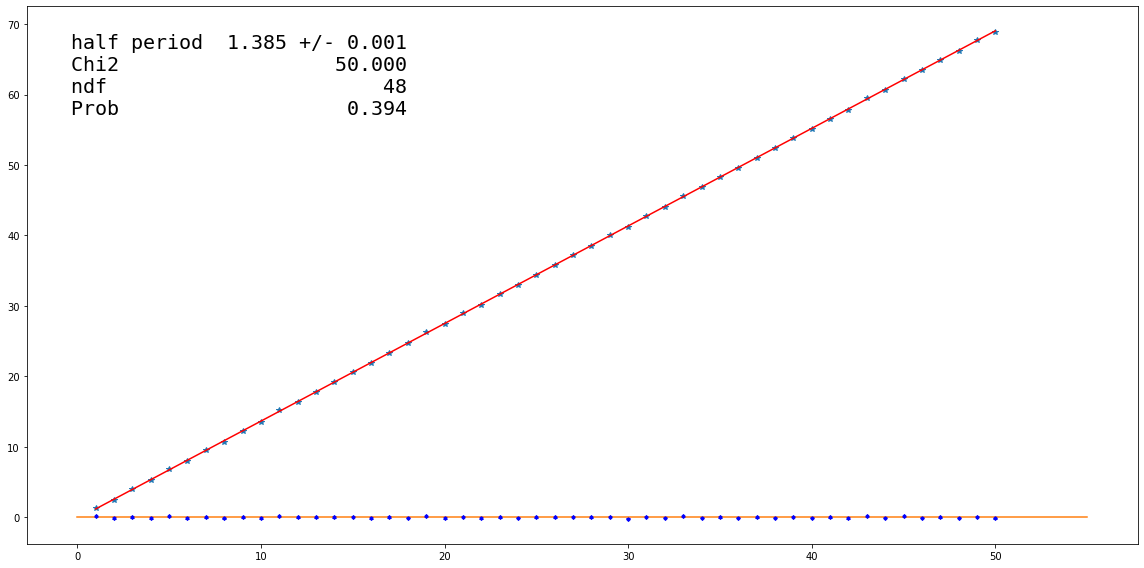

In [7]:
#plot tan's graph
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(n, t,'*')
ax.plot(n, fit_func(n, *minuitLin_tan.args), '-r')
print( minuitLin_tan.values['k'], minuitLin_tan.errors['k'])

d = {
     'half period':    [minuitLin_tan.values['k'], minuitLin_tan.errors['k']],
     'Chi2':     Chi2Lin_tan,
     'ndf':      NdofLin_tan,
     'Prob':     ProbLin_tan,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.04, 0.95, text, ax, fontsize=20)
fig.tight_layout()

ax.errorbar(n,residual,yerr=RMS_r,xerr=0,fmt='b.',capsize=2)
x=np.linspace(0,55,1000)
y=np.zeros_like(x)
ax.plot(x,y)


In [8]:
#deal with chris's data
chi2_object_chris = Chi2Regression(fit_func,n1,t1,np.std(t1)) 
minuitLin_chris = Minuit(chi2_object_chris, pedantic=False, print_level=0)  
minuitLin_chris.migrad();  # perform the actual fit

#residual,the uncertainty
residual_chris=t1- fit_func(n1, *minuitLin_chris.args)

RMS_r_chris=np.sqrt(np.sum(np.square(residual_chris))/len(residual_chris))

#the second fit use rms as an error

chi2_object_chris = Chi2Regression(fit_func,n1,t1,RMS_r_chris)
minuitLin_chris = Minuit(chi2_object_chris, pedantic=False, print_level=0)  
minuitLin_chris.migrad();  # perform the actual fit
Chi2Lin_chris = minuitLin_chris.fval # the chi2 value

NvarLin_chris = 2                      # Number of variables (k and b)
NdofLin_chris = len(n1) - NvarLin_chris   # Number of degrees of freedom

        #from scipy import stats
ProbLin_chris =  stats.chi2.sf(Chi2Lin_chris, NdofLin_chris) # The chi2 probability given N_DOF degrees of freedom

1.3865180792318492
0.000717831126841245


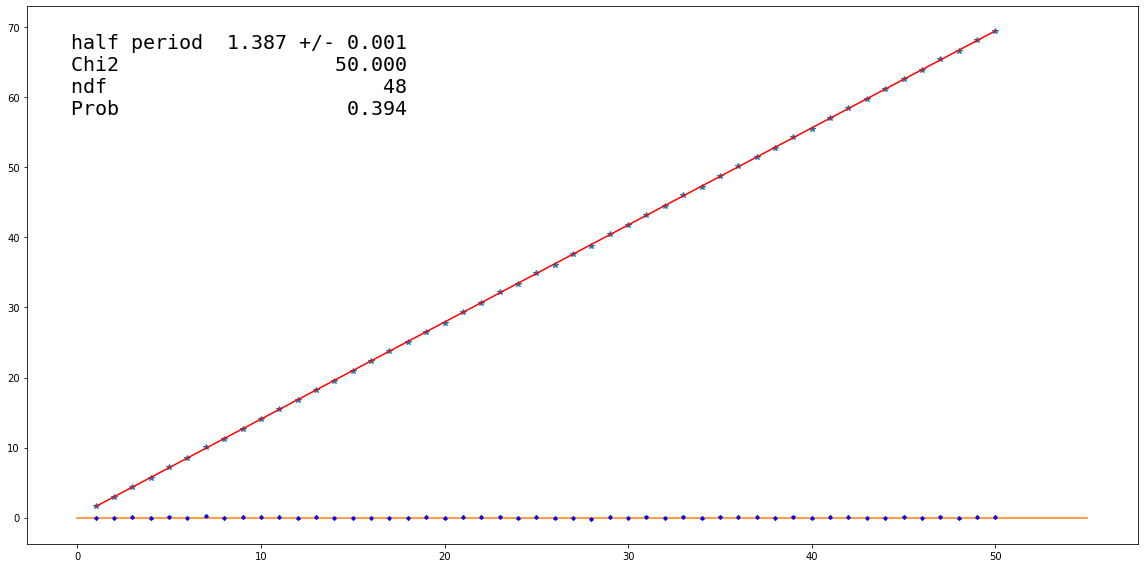

In [9]:
#plot chris graph
fig_chris, ax_chris = plt.subplots(figsize=(16, 8))
ax_chris.plot(n1, t1,'*')
ax_chris.plot(n1, fit_func(n1, *minuitLin_chris.args), '-r')
print(minuitLin_chris.values['k'])
print(minuitLin_chris.errors['k'])

d = {
     'half period':    [minuitLin_chris.values['k'], minuitLin_chris.errors['k']],
     'Chi2':     Chi2Lin_chris,
     'ndf':      NdofLin_chris,
     'Prob':     ProbLin_chris,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.04, 0.95, text, ax_chris, fontsize=20)
fig_chris.tight_layout()

ax_chris.errorbar(n1,residual_chris,yerr=RMS_r_chris,xerr=0,fmt='b.',capsize=2)
x=np.linspace(0,55,1000)
y=np.zeros_like(x)
ax_chris.plot(x,y)

In [10]:
#deal with Michael's data
#the first fit use the std as an error
chi2_object_M = Chi2Regression(fit_func,n2,t2,np.std(t2)) 
minuitLin_M = Minuit(chi2_object_M, pedantic=False, print_level=0)  
minuitLin_M.migrad();  # perform the actual fit

#residual,the uncertainty
residual_M=t2- fit_func(n2, *minuitLin_M.args)

RMS_r_M=np.sqrt(np.sum(np.square(residual_M))/len(residual_M))

#the second fit use rms as an error

chi2_object_M = Chi2Regression(fit_func,n2,t2,RMS_r_M)
minuitLin_M = Minuit(chi2_object_M, pedantic=False, print_level=0)  
minuitLin_M.migrad();  # perform the actual fit
Chi2Lin_M = minuitLin_M.fval # the chi2 value

NvarLin_M = 2                      # Number of variables (alpha0 and alpha1)
NdofLin_M = len(n2) - NvarLin_M   # Number of degrees of freedom

        #from scipy import stats
ProbLin_M =  stats.chi2.sf(Chi2Lin_M, NdofLin_M) # The chi2 probability given N_DOF degrees of freedom

1.3839527731092804
0.00040058753861500074


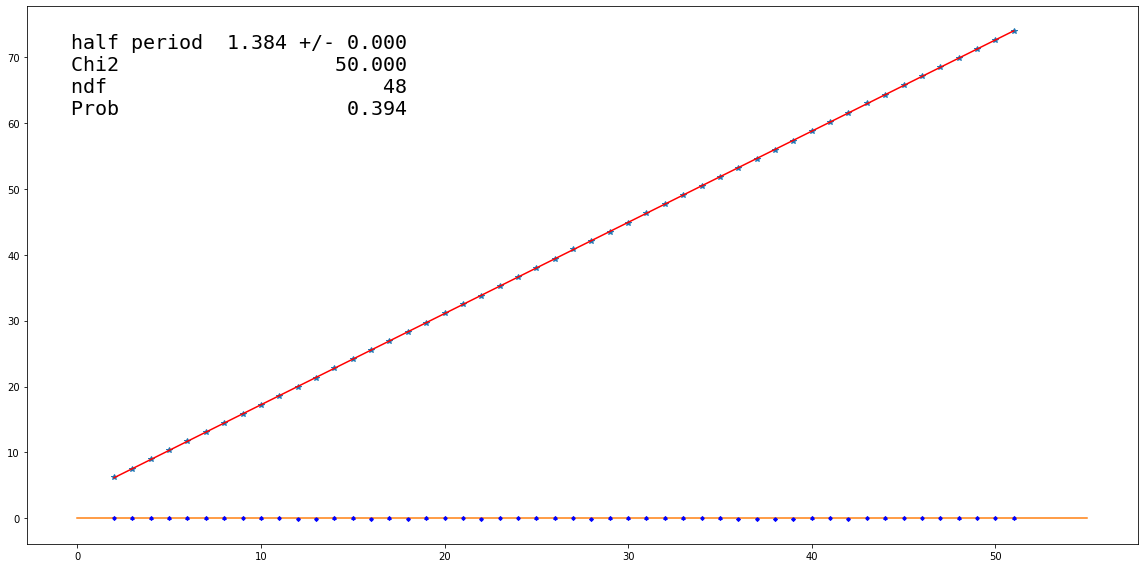

In [11]:
#plot Michael graph
fig_M, ax_M = plt.subplots(figsize=(16, 8))
ax_M.plot(n2, t2,'*')
ax_M.plot(n2, fit_func(n2, *minuitLin_M.args), '-r')
print(minuitLin_M.values['k'])
print(minuitLin_M.errors['k'])

d = {
     'half period':    [minuitLin_M.values['k'], minuitLin_M.errors['k']],
     'Chi2':     Chi2Lin_M,
     'ndf':      NdofLin_M,
     'Prob':     ProbLin_M,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.04, 0.95, text, ax_M, fontsize=20)
fig_M.tight_layout()

ax_M.errorbar(n2,residual_M,yerr=RMS_r_M,xerr=0,fmt='b.',capsize=2)
x=np.linspace(0,55,1000)
y=np.zeros_like(x)
ax_M.plot(x,y)

In [12]:
#deal with Luca's data
#the first fit use the std as an error
chi2_object_L = Chi2Regression(fit_func,n3,t3,np.std(t3)) 
minuitLin_L = Minuit(chi2_object_L, pedantic=False, print_level=0)  
minuitLin_L.migrad();  # perform the actual fit

#residual,the uncertainty
residual_L=t3- fit_func(n3, *minuitLin_L.args)

RMS_r_L=np.sqrt(np.sum(np.square(residual_L))/len(residual_L))

#the second fit use rms as an error

chi2_object_L = Chi2Regression(fit_func,n3,t3,RMS_r_L)
minuitLin_L = Minuit(chi2_object_L, pedantic=False, print_level=0)  
minuitLin_L.migrad();  # perform the actual fit
Chi2Lin_L = minuitLin_L.fval # the chi2 value

NvarLin_L = 2                      # Number of variables (alpha0 and alpha1)
NdofLin_L = len(n3) - NvarLin_L   # Number of degrees of freedom

        #from scipy import stats
ProbLin_L =  stats.chi2.sf(Chi2Lin_L, NdofLin_L) # The chi2 probability given N_DOF degrees of freedom

1.385477584633794
0.000591601615798421


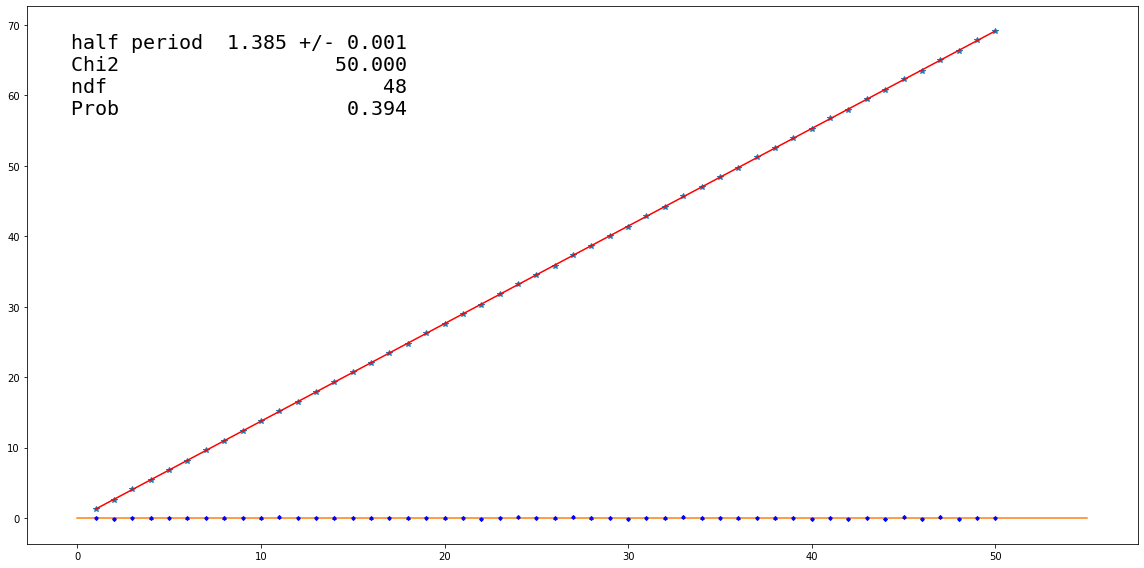

In [13]:
#plot Luca graph
fig_L, ax_L = plt.subplots(figsize=(16, 8))
ax_L.plot(n3, t3,'*')
ax_L.plot(n3, fit_func(n3, *minuitLin_L.args), '-r')
print(minuitLin_L.values['k'])
print(minuitLin_L.errors['k'])

d = {
     'half period':    [minuitLin_L.values['k'], minuitLin_L.errors['k']],
     'Chi2':     Chi2Lin_L,
     'ndf':      NdofLin_L,
     'Prob':     ProbLin_L,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.04, 0.95, text, ax_L, fontsize=20)
fig_L.tight_layout()

ax_L.errorbar(n3,residual_L,yerr=RMS_r_L,xerr=0,fmt='b.',capsize=2)
x=np.linspace(0,55,1000)
y=np.zeros_like(x)
ax_L.plot(x,y)

In [14]:
def weighted_average(x,sigma):
    above=0
    under=0
    for i in range(len(x)):
        above += x[i]/np.square(sigma[i])
        under += 1/np.square(sigma[i])
    mean=above/under
    return mean

In [16]:
T=np.array([minuitLin_tan.values['k'],minuitLin_chris.values['k'],minuitLin_M.values['k'],minuitLin_L.values['k']])*2
T_error=np.array([minuitLin_tan.errors['k'],minuitLin_chris.errors['k'],minuitLin_M.errors['k'],minuitLin_L.errors['k']])
T_weighted_mean=weighted_average(T,T_error)
#T_mean=np.mean(T)
print(np.mean(T))
print(T_weighted_mean)

2.770391687875227
2.7696059149569967


In [ ]:
def func_gaussian(x, mu, sigma) :
    return 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mu)**2/sigma**2)

In [ ]:
frequency,bin_edges=np.histogram(residual,bins=8,range=(-0.15,0.15))
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_frequency = np.sqrt(frequency)

x = bin_centers[frequency>0]
y = frequency[frequency>0]
sy = s_frequency[frequency>0]
print(sum(y))

chi2_gaussian1 = Chi2Regression(func_gaussian,x,y,sy)
minuit_gaussian1 = Minuit(chi2_gaussian1, pedantic=False,mu=5,sigma=np.sqrt(5)) #   
minuit_gaussian1.migrad();       # Perform the actual fit
Ndof_gau = len(y) - 3           # 3 parameters in fit
Prob_gau = stats.chi2.sf(minuit_gaussian1.fval, Ndof_gau)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.errorbar(x, y, yerr=sy, xerr=0.02, label='Distribution of residual', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax.set(xlim=(-0.3, 0.3), ylim=(0, 1.2*np.max(y)), xlabel='residual', ylabel='Frequency');

xaxis = np.linspace(-0.5, 0.5, 1000)  
yaxis = func_gaussian(xaxis, *minuit_gaussian1.args)

ax.plot(xaxis, yaxis, 'r-', label=f'Gaussian fit: p(Chi2={minuit_gaussian1.fval:.1f},Ndof={Ndof_gau:d}) = {Prob_gau:.3f}')

ax.legend()


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian, and from the RMS what your (typical) uncert

In [ ]:
x=[0,2.5,6,85,2,-1]
y=x[x>0]
print(y)